In [26]:
%matplotlib inline
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-27 11:29:41,764: Credentials are already in use. The existing account in the session will be replaced.


## Introduction
With Spik3 the goal is to find a 3 qubit Quantum Circuit that has 3 outcomes with 1/3 probability each.

In [27]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3,3)
# spike2 solution
circ.h(2)
circ.cx(2, 0)
circ.cx(2, 1)

# Measure
circ.barrier(range(3))
circ.measure(range(3),range(3))

circ.draw()

┌───┐      ░ ┌─┐      
q_0: ─────┤ X ├──────░─┤M├──────
          └─┬─┘┌───┐ ░ └╥┘┌─┐   
q_1: ───────┼──┤ X ├─░──╫─┤M├───
     ┌───┐  │  └─┬─┘ ░  ║ └╥┘┌─┐
q_2: ┤ H ├──■────■───░──╫──╫─┤M├
     └───┘           ░  ║  ║ └╥┘
c_0: ═══════════════════╩══╬══╬═
                           ║  ║ 
c_1: ══════════════════════╩══╬═
                              ║ 
c_2: ═════════════════════════╩═

{'111': 536, '000': 488}


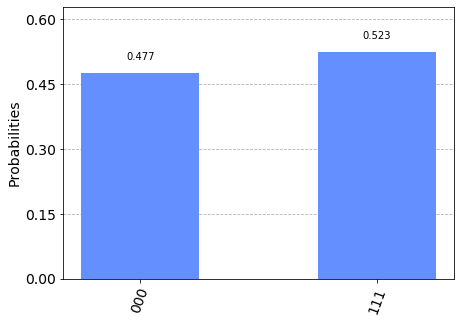

In [28]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
plot_histogram(counts)

Job Status: job has successfully run


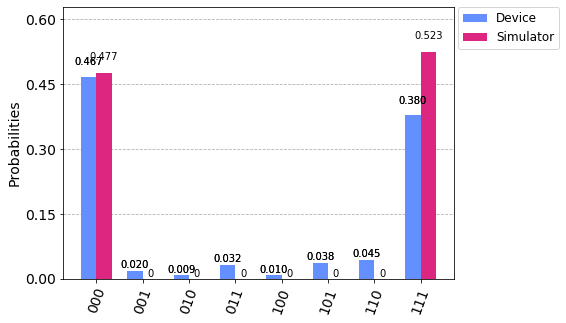

In [29]:
backend = provider.get_backend('ibmq_london')
job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [30]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>